Column Names in the Dataset:
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Cleaned Column Names:
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    ob

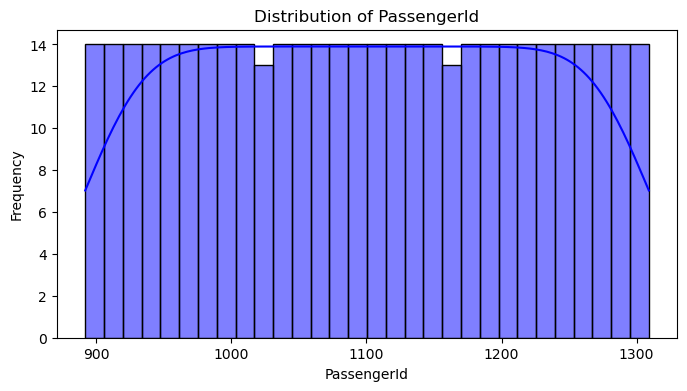

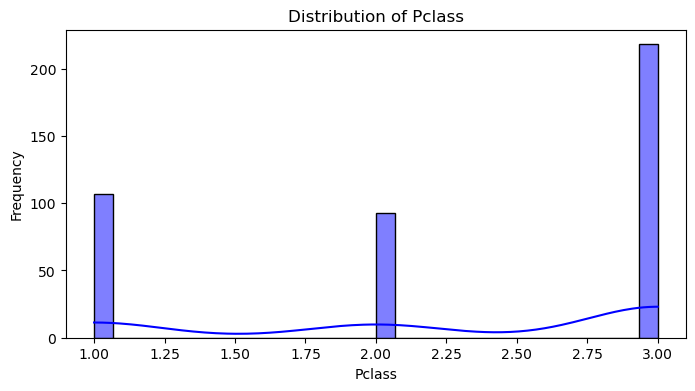

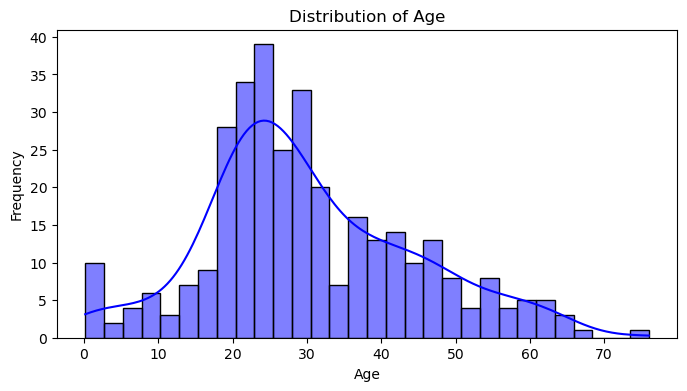

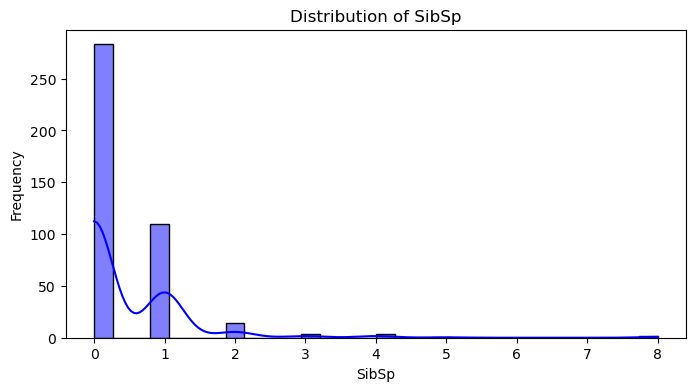

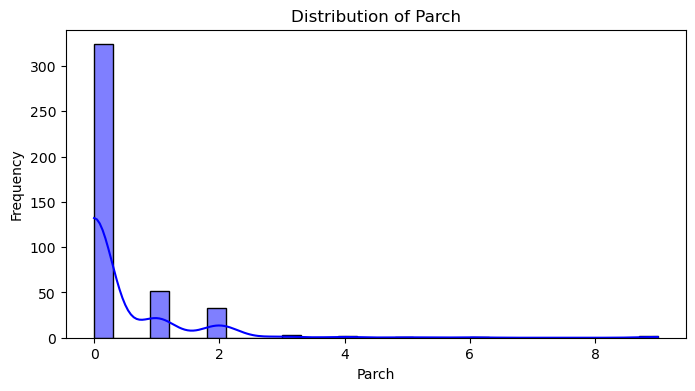

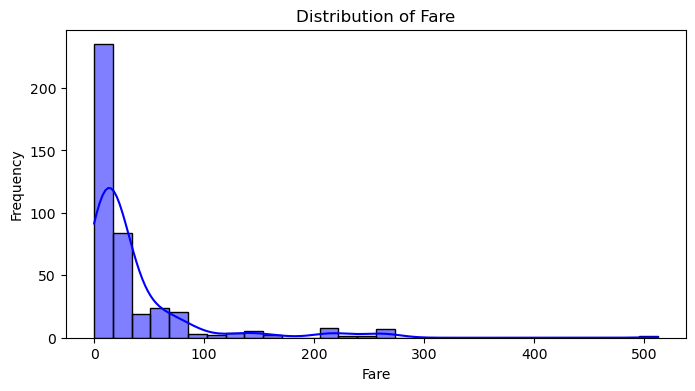

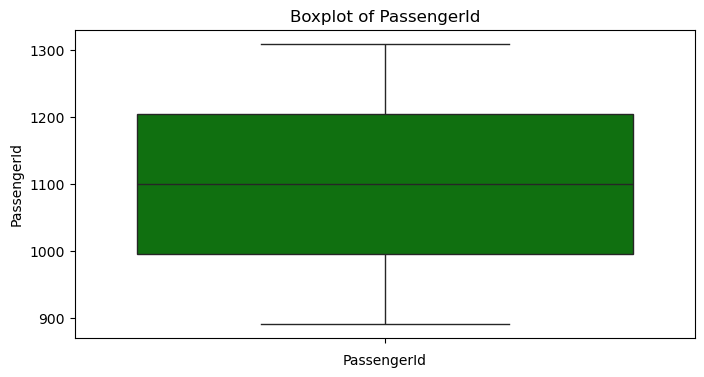

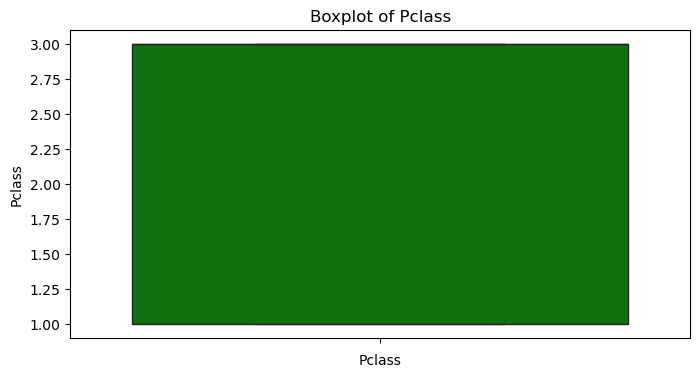

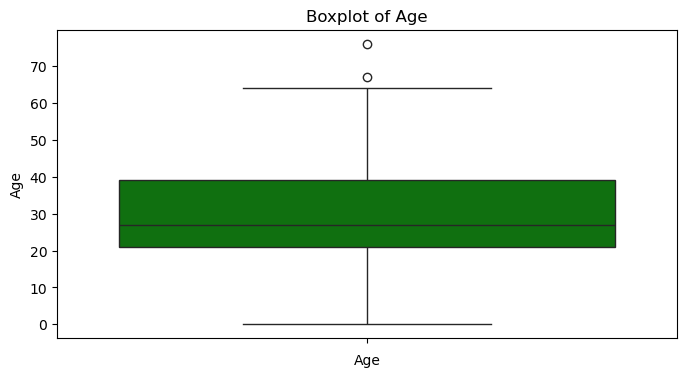

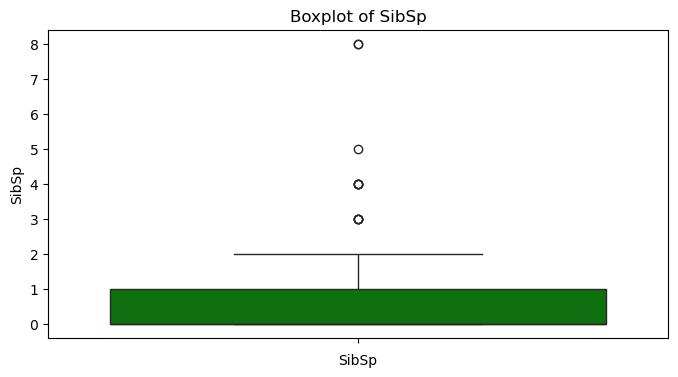

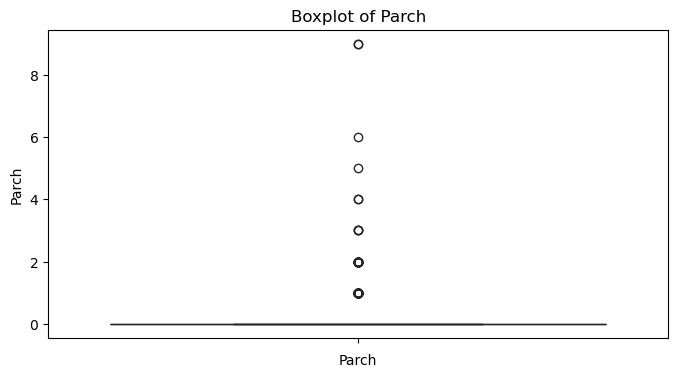

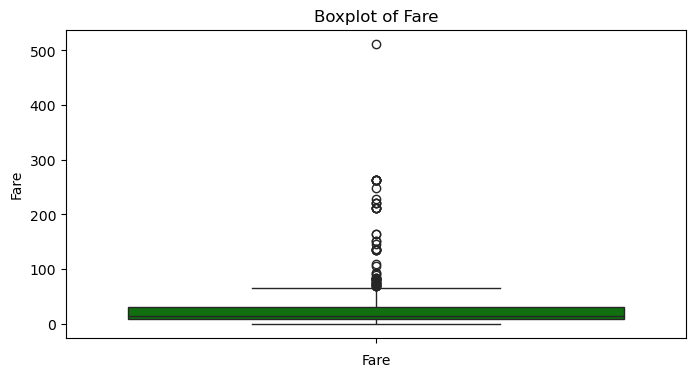

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


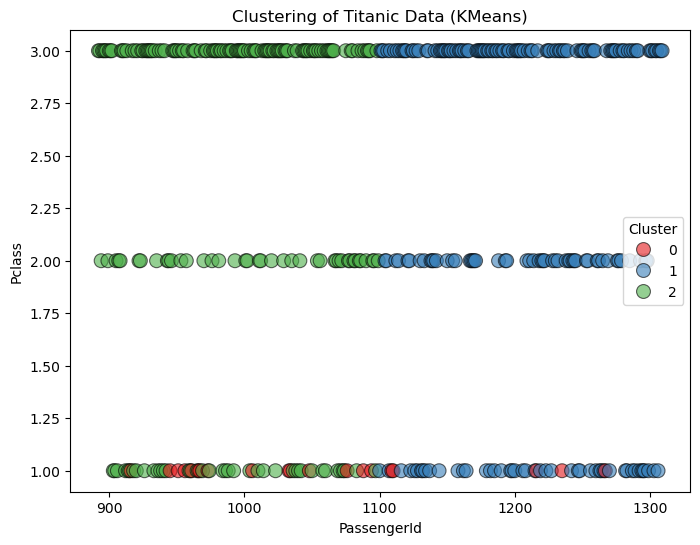

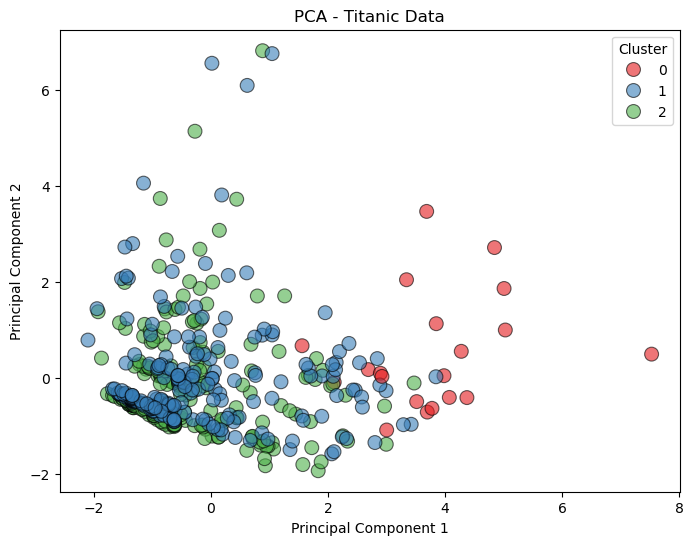

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the Titanic dataset from the Excel file
file_path = r'C:\Users\User\Downloads\Logistic Regression\Logistic Regression\titanic_test.csv'  # Path of the Titanic dataset
data = pd.read_csv(file_path)

# Inspect and clean column names
print("Column Names in the Dataset:")
print(data.columns)
data.columns = data.columns.str.strip()  # Remove any extra spaces
print("\nCleaned Column Names:")
print(data.columns)

# Display basic dataset information
print("Dataset Information:")
data.info()
print("\nFirst Five Rows:")
print(data.head())

# Step 1: Exploratory Data Analysis (EDA)
print("\nStatistical Summary:")
print(data.describe())

# Visualizations
# Histograms for numerical variables
numerical_columns = data.select_dtypes(include=[np.number]).columns
for column in numerical_columns:
    if column in data.columns:  # Check if the column exists
        plt.figure(figsize=(8, 4))
        sns.histplot(data[column], kde=True, bins=30, color='blue')
        plt.title(f"Distribution of {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.show()

# Boxplots for numerical variables
for column in numerical_columns:
    if column in data.columns:  # Check if the column exists
        plt.figure(figsize=(8, 4))
        sns.boxplot(data[column], color='green')
        plt.title(f"Boxplot of {column}")
        plt.xlabel(column)
        plt.show()

# Step 2: Data Preprocessing
# Handle missing values
numeric_columns = data.select_dtypes(include=[np.number]).columns  # Numeric columns
categorical_columns = data.select_dtypes(include=['object']).columns  # Categorical columns

# Fill missing numeric values with the median
for col in numeric_columns:
    if data[col].isnull().sum() > 0:  # Check if there are missing values
        data[col] = data[col].fillna(data[col].median())

# Fill missing categorical values with the mode
for col in categorical_columns:
    if data[col].isnull().sum() > 0:  # Check if there are missing values
        data[col] = data[col].fillna(data[col].mode()[0])

# Encode categorical variables (Sex and Embarked columns)
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Define features (X) - Drop the target column, which doesn't exist, and non-predictive columns
X = data.drop(columns=['Name', 'Ticket', 'Cabin'], errors='ignore')  # Drop non-numeric or irrelevant columns

# Since there is no 'Survived' column, we won't have a target variable for classification

# Step 3: Unsupervised Learning Example (Clustering with KMeans)
from sklearn.cluster import KMeans

# Apply clustering (unsupervised learning)
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=data['Cluster'], palette="Set1", s=100, alpha=0.6, edgecolor='k')
plt.title("Clustering of Titanic Data (KMeans)")
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.show()

# Step 4: PCA (Principal Component Analysis) for dimensionality reduction
from sklearn.decomposition import PCA

# Standardize the features for PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize the PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data['Cluster'], palette="Set1", s=100, alpha=0.6, edgecolor='k')
plt.title("PCA - Titanic Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

